In [15]:
%matplotlib inline
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import sklearn

import scipy.stats as stats

from sklearn.metrics import mean_squared_error as MSE

In [43]:
def gh_filter(data, x0, dx, dt, g, h):
    """
    Performs g-h filter on 1 state variable with a fixed g and h.
    ’data’ contains the data to be filtered.
    ’x0’ is the initial value for our state variable
    ’dx’ is the initial change rate for our state variable
    ’g’ is the g-h’s g scale factor
    ’h’ is the g-h’s h scale factor
    ’dt’ is the length of the time step
    """
    #
    x = x0
    estimates = []
    for d in data:
        x_est = x + dx*dt
        #
        residual = d - x_est
        dx = dx + h*residual/dt
        x = x_est + g*residual
        estimates.append(x)
    return np.array(estimates)

In [41]:
def gen_noise(dx=.004, n=1000, Pn=1):
    '''
    generic noise generating function
    '''
    t = np.arange(0,n)*dx
    data = t + Pn*np.random.rand(len(t))
    return t,data

def gen_data(dx=.004, n=1000, Pn=1, ddx=2):
    '''
    generic noise generating function
    '''
    t = np.arange(0,n)*dx
    shift = dx+np.arange(0,n)**2*dx
    data = t + shift + Pn*np.random.rand(len(t))
    return t,data

0.0134323137275 0.0129183082554


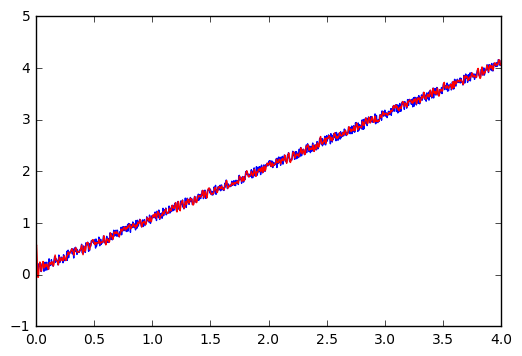

In [45]:
t, data = gen_noise(Pn=.2)

plt.plot(t, data)
data_f = gh_filter(data, 0, 1, 1, .5, .5)
plt.plot(t, data_f, c='r')

print MSE(t, data),
print MSE(t, data_f)

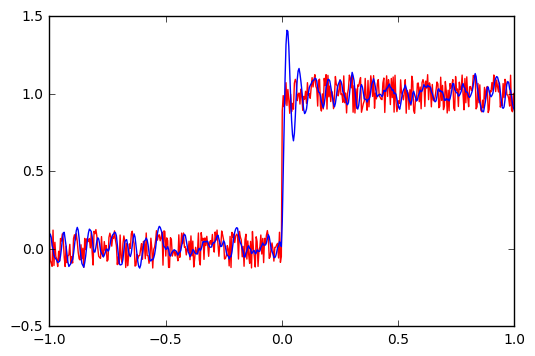

In [56]:
import ipywidgets as widgets
from IPython.html.widgets import interact

#
t = np.linspace(-1,1,500)
nu = .25 * (np.random.rand(500) - .5)
data = t + nu
step = (t>0).astype(float)
step_data = step + nu

def plt_step(g, h, dt, dx, noise=True):
    if noise is True:
        s = step_data
    else:
        s = step
    plt.plot(t, s, c='r')
    step_f = gh_filter(s, 0, dx, dt, g, h)
    plt.plot(t, step_f)
    plt.ylim([-.5, 1.5])
    
interact(plt_step, g=(0,2,.01), h=(0,2,.01), 
         dt=(0,5,.01), dx=(0,5,.01),
         dxnoise=True)